# 1. Importar Librerías

In [2]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier  ### para analizar modelo

# 2. Importar Datos

In [3]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')


# 3. Modelos

## 3.1. Modelo Random Forest Classifier

In [4]:
x_test.shape

(1737, 100, 100, 3)

In [5]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [8]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [19]:
print('------------------------TRAIN---------------------------')
pred_train = rf.predict_proba(x_train2)[:, 1]
pred_train = (pred_train > 0.98).astype(int)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

print()
print('------------------------TEST---------------------------')
pred_test = rf.predict_proba(x_test2)[:, 1]
pred_test = (pred_test > 0.98).astype(int)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

------------------------TRAIN---------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2864
           1       1.00      0.77      0.87      4089

    accuracy                           0.86      6953
   macro avg       0.88      0.88      0.86      6953
weighted avg       0.90      0.86      0.86      6953


------------------------TEST---------------------------
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       716
           1       1.00      0.58      0.73      1021

    accuracy                           0.75      1737
   macro avg       0.81      0.79      0.75      1737
weighted avg       0.85      0.75      0.75      1737



0.7899118511263468

## 3.2. Red Neuronal Estándar

In [20]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
##### configura el optimizador y la función para optimizar ##############
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])

In [22]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - AUC: 0.7556 - Precision: 0.7645 - Recall: 0.6757 - accuracy: 0.6988 - loss: 0.9080 - val_AUC: 0.9598 - val_Precision: 0.9612 - val_Recall: 0.8981 - val_accuracy: 0.9188 - val_loss: 0.2789
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - AUC: 0.9586 - Precision: 0.9321 - Recall: 0.9374 - accuracy: 0.9213 - loss: 0.2673 - val_AUC: 0.9705 - val_Precision: 0.9588 - val_Recall: 0.9354 - val_accuracy: 0.9384 - val_loss: 0.2122
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - AUC: 0.9755 - Precision: 0.9490 - Recall: 0.9513 - accuracy: 0.9420 - loss: 0.1955 - val_AUC: 0.9657 - val_Precision: 0.8021 - val_Recall: 0.9961 - val_accuracy: 0.8532 - val_loss: 0.4266
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - AUC: 0.9750 - Precision: 0.9385 - Recall: 0.9502 - accuracy: 0.9327 - loss: 0.1965 - val_AUC: 0.9846 - val_Precision: 0.9801 - val_Recall: 0.9667 - val_accuracy: 0.9689 - val_loss: 0.1483
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━

In [23]:
#########Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 7ms/step - AUC: 0.9922 - Precision: 0.9778 - Recall: 0.9902 - accuracy: 0.9810 - loss: 0.0989
Test auc: 0.99217689037323


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       716
           1       0.99      0.89      0.94      1021

    accuracy                           0.93      1737
   macro avg       0.93      0.94      0.93      1737
weighted avg       0.94      0.93      0.93      1737



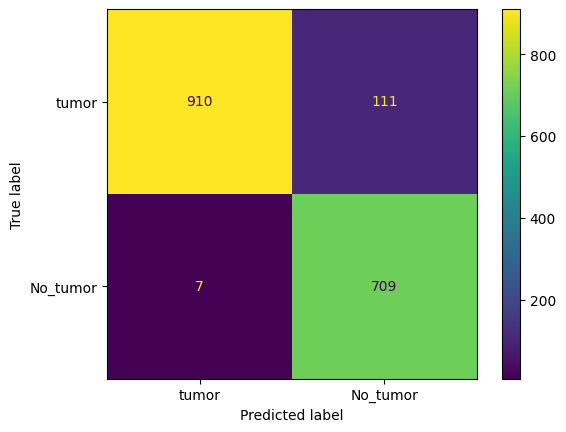

In [24]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


In [122]:
import plotly.express as px
p = fc_model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## 3.3. Red Neuronal Convolucional

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [27]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - AUC: 0.7273 - loss: 0.7123 - val_AUC: 0.9698 - val_loss: 0.2234
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - AUC: 0.9726 - loss: 0.2091 - val_AUC: 0.9861 - val_loss: 0.1465
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - AUC: 0.9870 - loss: 0.1454 - val_AUC: 0.9884 - val_loss: 0.1314
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - AUC: 0.9911 - loss: 0.1191 - val_AUC: 0.9915 - val_loss: 0.1086
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - AUC: 0.9934 - loss: 0.0947 - val_AUC: 0.9912 - val_loss: 0.1049
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - AUC: 0.9967 - loss: 0.0648 - val_AUC: 0.9923 - val_loss: 0.0914
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - AUC: 0.9972 - loss: 0.0543 - val_AUC: 0.9934 - val_loss: 0.0863
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - AUC: 0.9974 - loss: 0.0538 - val_AUC: 0.9934 - val_loss: 0.0742
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       716
           1       0.99      0.87      0.93      1021

    accuracy                           0.92      1737
   macro avg       0.92      0.93      0.92      1737
weighted avg       0.93      0.92      0.92      1737



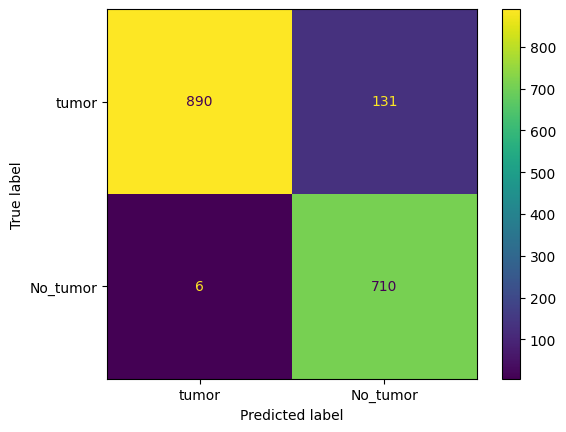

In [28]:
pred_test1=(model.predict(x_test) >= 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))


In [129]:
p = model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [135]:
falsos_n = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    # Si la predicción es 0 (no hay tumor) 
    if pred_test1[i] == 0 and y_test[i] == 1:
        falsos_n.append(i)

falsos_n

[791, 1230, 1726, 1727, 1728, 1735, 1736]

In [136]:
falsos_p = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    if pred_test1[i] == 1 and y_test[i] == 0:
        falsos_p.append(i)

falsos_p

[146, 398, 412, 415, 438, 456, 457, 472, 473]